# Visualization and Insights

## Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')

## Load the Cleaned Data


In [2]:
data = pd.read_csv('../data/processed/cleaned_data.csv')


## Aggregate Numeric Data by Company


In [3]:
aggregated_data = data.groupby('Company', as_index=False).mean(numeric_only=True)
aggregated_data


,Company,Revenue,Net Income,Liabilities,Assets,Equity,Debt to Equity %
0,Allianz SE,1.301543e+10,1.314984e+09,2.992707e+10,5.697155e+10,2.704448e+10,451.397500
1,BASF SE,1.320693e+10,1.322951e+09,2.894841e+10,6.325328e+10,3.430486e+10,552.036250
2,BMW AG,1.279363e+10,1.264378e+09,3.164122e+10,6.254100e+10,3.089978e+10,420.747813
3,Bayer AG,1.228015e+10,1.244583e+09,3.220732e+10,6.085879e+10,2.865147e+10,411.859375
4,Daimler AG,1.298295e+10,1.262170e+09,3.311068e+10,6.102514e+10,2.791445e+10,384.516875
5,Deutsche Bank AG,1.255227e+10,1.254326e+09,3.180432e+10,6.448487e+10,3.268055e+10,398.719688
6,Deutsche Telekom AG,1.294884e+10,1.242394e+09,2.972130e+10,6.296833e+10,3.324702e+10,346.870938
7,Merck KGaA,1.342963e+10,1.394800e+09,3.421248e+10,6.261155e+10,2.839908e+10,458.833438
8,Porsche AG,1.180174e+10,1.128405e+09,3.193370e+10,6.290280e+10,3.096910e+10,326.929375
9,SAP SE,1.241668e+10,1.100021e+09,3.241681e+10,6.149468e+10,2.907786e+10,238.142187


## Plot: Revenue vs. Net Income for Each Company


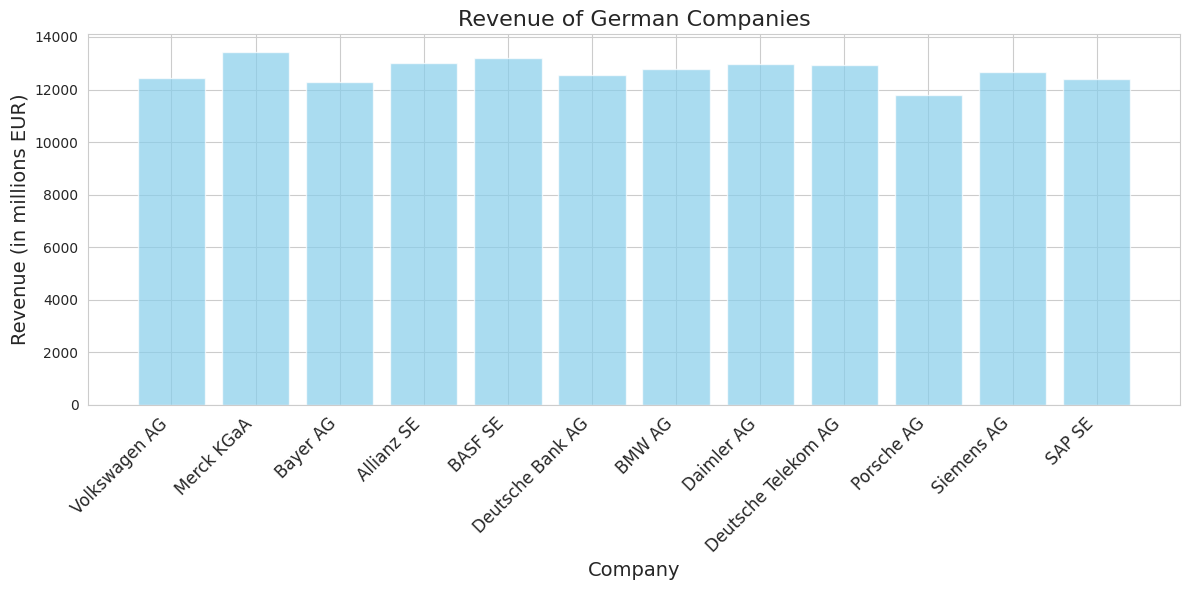

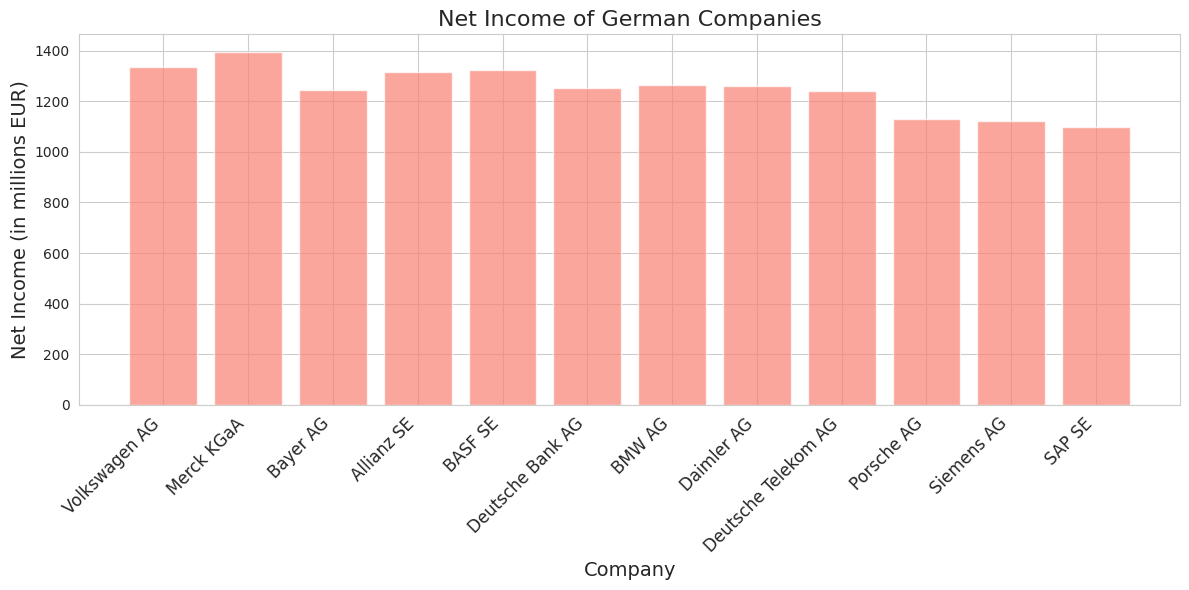

In [10]:
import matplotlib.pyplot as plt

# Plot 1: Revenue
plt.figure(figsize=(12, 6))
plt.bar(aggregated_data['Company'], aggregated_data['Revenue'] / 1e6, color='skyblue', alpha=0.7)
plt.title("Revenue of German Companies", fontsize=16)
plt.xlabel("Company", fontsize=14)
plt.ylabel("Revenue (in millions EUR)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Plot 2: Net Income
plt.figure(figsize=(12, 6))
plt.bar(aggregated_data['Company'], aggregated_data['Net Income'] / 1e6, color='salmon', alpha=0.7)
plt.title("Net Income of German Companies", fontsize=16)
plt.xlabel("Company", fontsize=14)
plt.ylabel("Net Income (in millions EUR)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


## Profit Margin Analysis


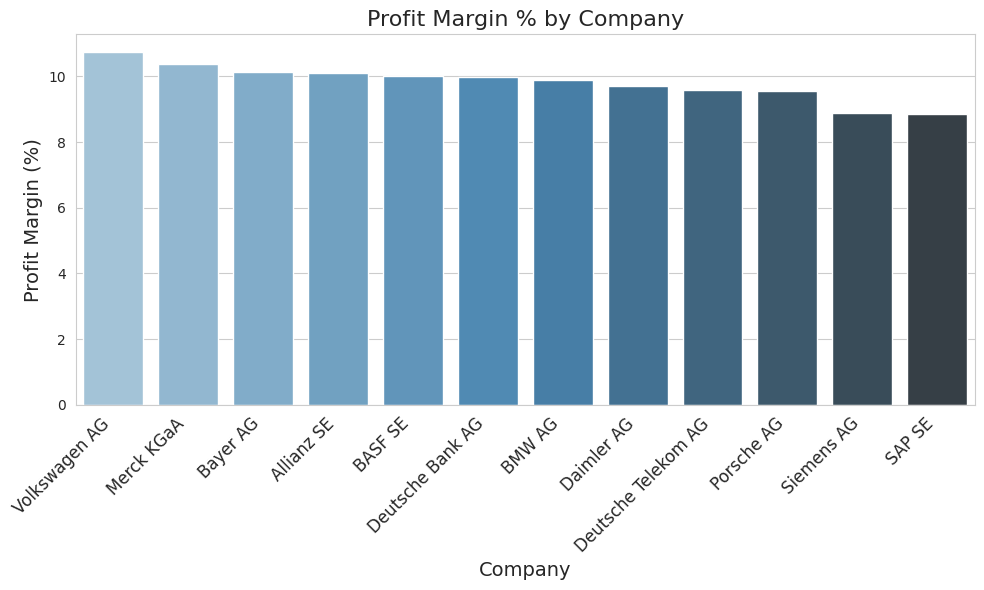

In [6]:
# Calculate Profit Margin
aggregated_data['Profit Margin %'] = (aggregated_data['Net Income'] / aggregated_data['Revenue']) * 100
aggregated_data.sort_values('Profit Margin %', ascending=False, inplace=True)

# Plot Profit Margin
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Company',
    y='Profit Margin %',
    data=aggregated_data,
    hue='Company',
    palette='Blues_d',
    dodge=False,
    legend=False
)
plt.title("Profit Margin % by Company", fontsize=16)
plt.xlabel("Company", fontsize=14)
plt.ylabel("Profit Margin (%)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

## Debt to Equity Ratio vs. Net Income


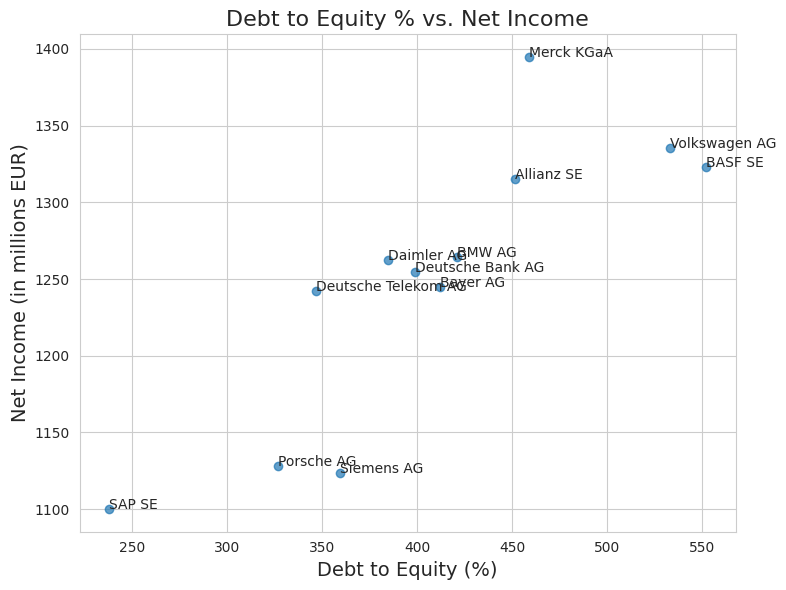

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(aggregated_data['Debt to Equity %'], aggregated_data['Net Income'] / 1e6, alpha=0.7)
for i, company in enumerate(aggregated_data['Company']):
    plt.annotate(company, (aggregated_data['Debt to Equity %'].iloc[i], aggregated_data['Net Income'].iloc[i] / 1e6))
plt.title("Debt to Equity % vs. Net Income", fontsize=16)
plt.xlabel("Debt to Equity (%)", fontsize=14)
plt.ylabel("Net Income (in millions EUR)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## Market Share by Revenue (Pie Chart)


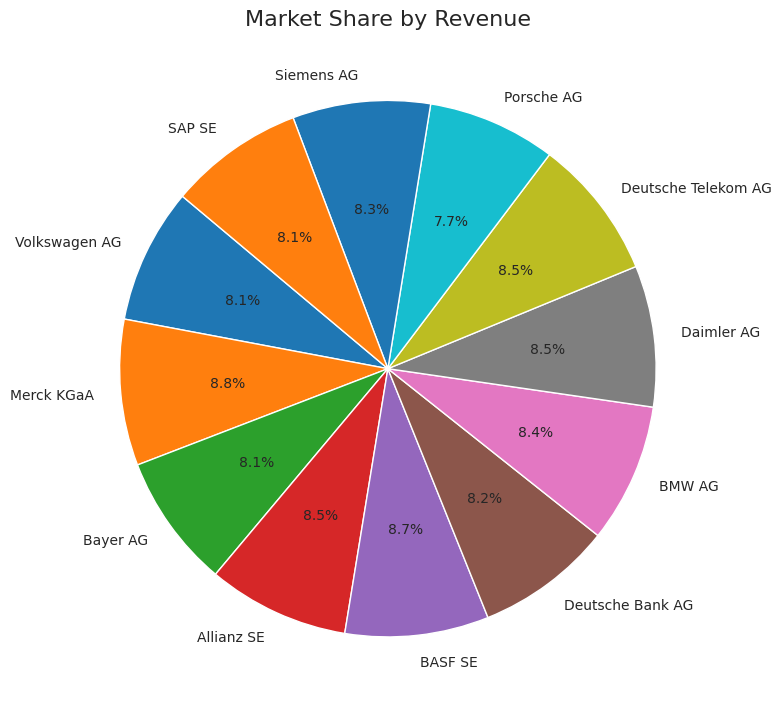

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(aggregated_data['Revenue'], labels=aggregated_data['Company'], autopct='%1.1f%%', startangle=140)
plt.title("Market Share by Revenue", fontsize=16)
plt.tight_layout()
plt.show()
